In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import os

In [2]:
x = input('Laptop ? [y/n]')
if x == 'n':
    path = 'E:\\Data_Science\\OpenClassRoom\\Projet 6\\Flipkart'
    df=pd.read_csv(path + '\\flipkart_com-ecommerce_sample_1050.csv')
else:
    path = 'C:\\Users\\Nico Janko\\Documents\\Data_Science\\OpenClassRoom\\Projet 6\\Flipkart'
    df = pd.read_csv(path + '\\flipkart_com-ecommerce_sample_1050.csv')

Laptop ? [y/n] n


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [4]:
df['description']

0       Key Features of Elegance Polyester Multicolor ...
1       Specifications of Sathiyas Cotton Bath Towel (...
2       Key Features of Eurospa Cotton Terry Face Towe...
3       Key Features of SANTOSH ROYAL FASHION Cotton P...
4       Key Features of Jaipur Print Cotton Floral Kin...
                              ...                        
1045    Oren Empower Extra Large Self Adhesive Sticker...
1046    Wallmantra Large Vinyl Sticker Sticker (Pack o...
1047    Buy Uberlyfe Extra Large Pigmented Polyvinyl F...
1048    Buy Wallmantra Medium Vinyl Sticker Sticker fo...
1049    Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...
Name: description, Length: 1050, dtype: object

In [5]:
df['product_category_0'] = df['product_category_tree'].apply(lambda x: x.split('>>')[0])
print(df['product_category_0'].unique().shape[0])
df['product_category_1'] = df['product_category_tree'].apply(lambda x: x.split('>>')[1])
print(df['product_category_1'].unique().shape[0])

7
63


In [6]:
# select rows from categories with only 1 members
idx = list(df.groupby('product_category_1').filter(lambda x: len(x) < 4).index)
df = df.drop(index = idx)
print(df['product_category_1'].unique().shape[0])

37


In [7]:
df['product_category_1'].value_counts()

 Wrist Watches                   149
 Laptop Accessories               87
 Infant Wear                      84
 Coffee Mugs                      74
 Showpieces                       71
 Bed Linen                        65
 Fragrances                       65
 Network Components               49
 Cookware                         27
 Table Decor & Handicrafts        27
 Combos and Kits                  24
 Wall Decor & Clocks              22
 Bath Linen                       21
 Curtains & Accessories           19
 Makeup                           18
 Body and Skin Care               15
 Baby & Kids Gifts                15
 Baby Bedding                     15
 Kitchen & Dining Linen           14
 Baby Bath & Skin                 14
 Decorative Lighting & Lamps      14
 Kitchen Tools                    14
 Cushions, Pillows & Covers       13
 Containers & Bottles             13
 Hair Care                         9
 Bar & Glassware                   8
 Feeding & Nursing                 8
 

# Text

In [8]:
txt_df = df.iloc[:, [0, 10, 15, 16]]

<AxesSubplot:>

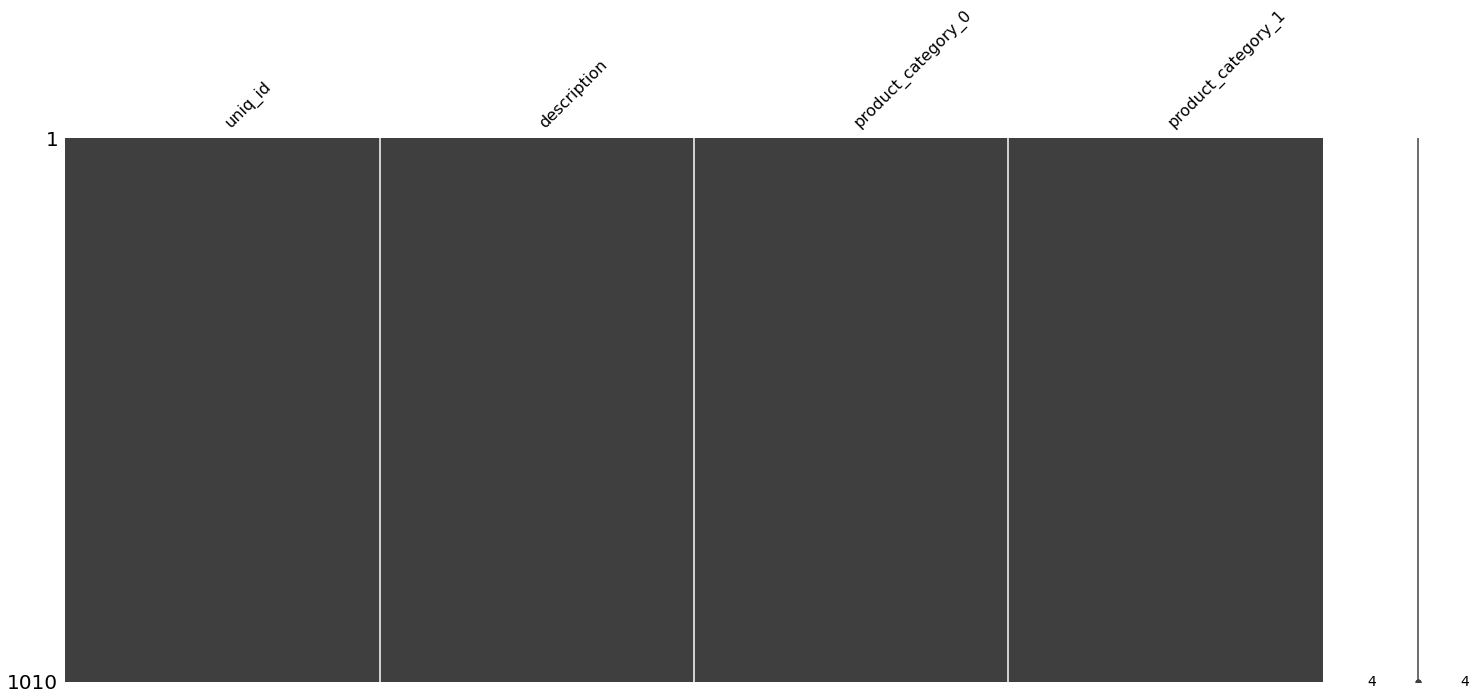

In [9]:
msno.matrix(txt_df)

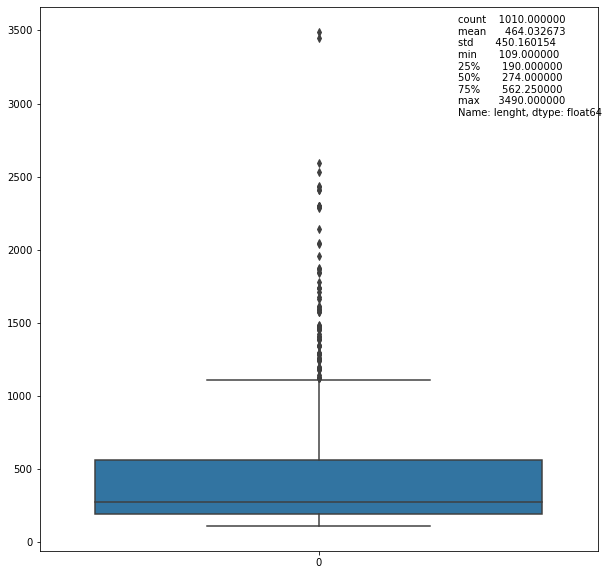

In [10]:
txt_df['lenght'] = txt_df['description'].apply(lambda x: len(x))
txt_df['lenght'].describe()
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data = txt_df['lenght'],
            ax=ax
           )
ax.text(0.75,
        0.8,
        str(txt_df['lenght'].describe()),
        transform=ax.transAxes
        )
plt.show()

In [11]:
out = []
q1 = txt_df['lenght'].quantile(0.25)
q3 = txt_df['lenght'].quantile(0.75)
interq = q3-q1
out = txt_df.loc[(txt_df['lenght'] < (q1-1.5*interq)) | (txt_df['lenght'] > (q3+1.5*interq))]
print(out.shape[0], out.shape[0]/txt_df.shape[0]*100)
out.sort_values(by='lenght', ascending = False).iloc[1, 1]

84 8.316831683168317


'Key Features of Sunlast 16 inch Laptop Backpack Laptop Backpack with solar panel Comfortable back panel with air-flow design Adjustable sternum strap Large outer elasticated mesh side pocket and a top carry handle Padded and Adjustable shoulder straps Charge your mobile by solar power Mobile power backup option Long life Easy to use,Sunlast 16 inch Laptop Backpack (Yellow) Price: Rs. 2,348 The Sunlast New Laptop Backpack with Solar Panel ensures complete safety to your laptop with its high-quality built and wide range of built-in features. With the inside of this bag featuring a protective padding, you can be rest assured that the laptop inside it will be well cushioned from any accidental damage caused when you bump into any surface. As it is made of nylon, this laptop backpack can withstand abrasions and is long lasting. This Sunlast Backpack comes with a unique solar panel which allows you to charge your mobile phone anywhere anytime. This Sunlast Laptop backpack with solar panel i

## Preprocessing

In [12]:
import nltk 
import string
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nico\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nico\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Nico\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nico\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Nico\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [13]:
words = set(nltk.corpus.words.words())
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = nltk.stem.WordNetLemmatizer()

def prepro(x):
    prepro_list = []
    for sentence in x:
        sent_wo_punc = "".join([i.lower() for i in sentence if i not in string.punctuation])
        sent_wo_num = ''.join([i for i in sent_wo_punc if not i.isdigit()])
        sent_token = nltk.tokenize.word_tokenize(sent_wo_num)
        sent_token_wo_punc = [i for i in sent_token if i not in string.punctuation]
        token_wo_stop = [i for i in sent_token_wo_punc if i not in stopwords]
        lem = (lemmatizer.lemmatize(i) for i in token_wo_stop if i not in string.punctuation)
        clean = ' '.join(i for i in lem if len(str(i)) > 2)
        prepro_list.append(clean)
    return prepro_list

In [14]:
sentence = txt_df['description'].sample()

In [15]:
sentence = txt_df['description'].sample()
sent_wo_punc = "".join([i.lower() for i in sentence if i not in string.punctuation])
sent_wo_num = ''.join([i for i in sent_wo_punc if not i.isdigit()])
sent_token = nltk.tokenize.word_tokenize(sent_wo_num)
sent_token_wo_punc = [i for i in sent_token if i not in string.punctuation]
token_wo_stop = [i for i in sent_token_wo_punc if i not in stopwords]
lem = (lemmatizer.lemmatize(i) for i in token_wo_stop if i not in string.punctuation)
clean = ' '.join(i for i in lem if len(str(i)) > 2)
clean

'sonata analog watch woman buy sonata analog watch woman online india flipkart.com contemporary dial white strap water resistant great discount genuine product day replacement guarantee free shipping cash delivery'

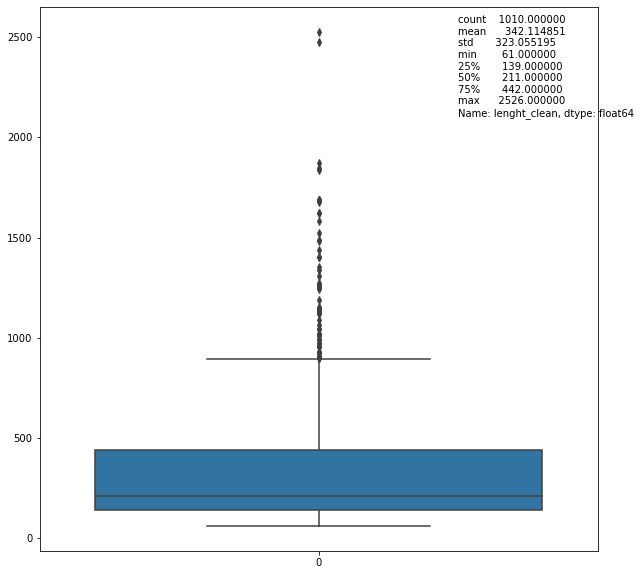

In [16]:
txt_df['description_clean'] = prepro(txt_df['description'])
txt_df['lenght_clean'] = txt_df['description_clean'].apply(lambda x: len(x))
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data = txt_df['lenght_clean'],
            ax=ax
           )
ax.text(0.75,
        0.8,
        str(txt_df['lenght_clean'].describe()),
        transform=ax.transAxes
        )
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
txt_df['labels_0'] = le.fit_transform(txt_df['product_category_0'])
txt_df['labels_1'] = le.fit_transform(txt_df['product_category_1'])

## Bag of Words

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
bag_of_words = vectorizer.fit_transform(txt_df['description_clean'].tolist())

In [19]:
from sklearn import cluster, metrics
clus = cluster.KMeans(n_clusters = df['product_category_0'].unique().shape[0], random_state = 38)
clus1 = cluster.KMeans(n_clusters = df['product_category_1'].unique().shape[0], random_state = 38)
clus.fit(bag_of_words)
clus1.fit(bag_of_words)
ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
print('The ari scores are {} for categorie 0 and {} for categorie 1.'.format(ari, ari1))

The ari scores are 0.04347971192978887 for categorie 0 and 0.17088699682635222 for categorie 1.


## Tf-Idf

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer(stop_words='english')
tf_idf_matrix = tf_idf_vect.fit_transform(txt_df['description_clean'].tolist())
clus.fit(tf_idf_matrix)
clus1.fit(tf_idf_matrix)
ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
print('The ari scores are {} for categorie 0 and {} for categorie 1.'.format(ari, ari1))

The ari scores are 0.23011715069516825 for categorie 0 and 0.3727111956352891 for categorie 1.


### n-gram

In [21]:
# Bag of words
for i in range(1, 6):
    vectorizer = CountVectorizer(stop_words='english', ngram_range=(i, i))
    bag_of_words = vectorizer.fit_transform(txt_df['description_clean'].tolist())
    clus.fit(bag_of_words)
    clus1.fit(bag_of_words)
    ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
    ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
    print('The ari scores for the {}-gram are {} for categorie 0 and {} for categorie 1.'.format(i, ari, ari1))


The ari scores for the 1-gram are 0.04347971192978887 for categorie 0 and 0.17088699682635222 for categorie 1.
The ari scores for the 2-gram are 0.18788138809417013 for categorie 0 and 0.14181557163055308 for categorie 1.
The ari scores for the 3-gram are 0.08889364858771694 for categorie 0 and 0.22073085713056412 for categorie 1.
The ari scores for the 4-gram are 0.1682530206795749 for categorie 0 and 0.2548436322856286 for categorie 1.
The ari scores for the 5-gram are 0.1657676781300784 for categorie 0 and 0.18351795609805607 for categorie 1.


In [22]:
# tf-idf
for i in range(1,6):
    tf_idf_vect = TfidfVectorizer(stop_words='english', ngram_range=(i, i))
    tf_idf_matrix = tf_idf_vect.fit_transform(txt_df['description_clean'].tolist())
    clus.fit(tf_idf_matrix)
    clus1.fit(tf_idf_matrix)
    ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
    ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
    print('The ari scores for the {}-gram are {} for categorie 0 and {} for categorie 1.'.format(i, ari, ari1))

The ari scores for the 1-gram are 0.23011715069516825 for categorie 0 and 0.3727111956352891 for categorie 1.
The ari scores for the 2-gram are 0.27530661665497014 for categorie 0 and 0.2760496071671797 for categorie 1.
The ari scores for the 3-gram are 0.19503649361515427 for categorie 0 and 0.2517013281127481 for categorie 1.
The ari scores for the 4-gram are 0.13592219345716947 for categorie 0 and 0.21927408248787222 for categorie 1.
The ari scores for the 5-gram are 0.18722478806480874 for categorie 0 and 0.19005264782254597 for categorie 1.


In [23]:
txt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010 entries, 0 to 1049
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   uniq_id             1010 non-null   object
 1   description         1010 non-null   object
 2   product_category_0  1010 non-null   object
 3   product_category_1  1010 non-null   object
 4   lenght              1010 non-null   int64 
 5   description_clean   1010 non-null   object
 6   lenght_clean        1010 non-null   int64 
 7   labels_0            1010 non-null   int32 
 8   labels_1            1010 non-null   int32 
dtypes: int32(2), int64(2), object(5)
memory usage: 103.3+ KB


## Word2Vec

In [24]:
txt_df['description_token'] = txt_df['description_clean'].apply(lambda x: nltk.tokenize.word_tokenize(x))

In [25]:
from gensim.models import Word2Vec
model = Word2Vec(vector_size = 300)
model.build_vocab(txt_df['description_token'].tolist())
model.train(txt_df['description_token'].tolist(), total_examples=model.corpus_count, epochs=35)

(1200233, 1721090)

In [26]:
model.corpus_count

1010

In [27]:
vector = model.wv

In [28]:
vector.most_similar("natural")

[('vibrantly', 0.7960993647575378),
 ('smooth', 0.7528254389762878),
 ('oudh', 0.7319940328598022),
 ('conditioner', 0.7286922335624695),
 ('pencil', 0.7189733386039734),
 ('bathing', 0.7106615900993347),
 ('lip', 0.7106197476387024),
 ('arabic', 0.6962919235229492),
 ('deep', 0.6943231225013733),
 ('shampoo', 0.6917372941970825)]

In [29]:
vector.most_similar('computer')

[('keyboard', 0.9352946877479553),
 ('vacuum', 0.9279608726501465),
 ('cleaner', 0.89902263879776),
 ('connect', 0.8841347098350525),
 ('cleaning', 0.8661434054374695),
 ('desktop', 0.8607556819915771),
 ('device', 0.8553949594497681),
 ('air', 0.8498939871788025),
 ('attachment', 0.8228358626365662),
 ('requirement', 0.8186331391334534)]

In [30]:
def get_mean(vectors, document):
    # check if each token is in the vocab (min =5)
    doc = [i for i in document if i in vectors.index_to_key]
    mean = np.mean(vectors[doc], axis = 0)
    return mean

In [31]:
txt_df['embeded_doc'] = txt_df['description_token'].apply(lambda x: get_mean(vector, x))

In [32]:
embeded_doc = pd.DataFrame(txt_df['embeded_doc'].tolist())
clus.fit(embeded_doc)
clus1.fit(embeded_doc)
ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
print('The ari scores are {} for categorie 0 and {} for categorie 1.'.format(ari, ari1))

The ari scores are 0.2568061616284578 for categorie 0 and 0.4226810793241453 for categorie 1.


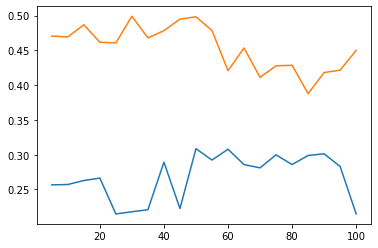

In [33]:
ari_l = []
ari_l1 = []
for i in np.arange(5,105,5):
    model.train(txt_df['description_token'].tolist(), total_examples=model.corpus_count, epochs=i)
    vector = model.wv
    temp = txt_df['description_token'].apply(lambda x: get_mean(vector, x))
    temp = pd.DataFrame(temp.tolist())
    clus.fit(temp)
    clus1.fit(temp)
    ari_l.append(metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 ))
    ari_l1.append(metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 ))
plt.plot(np.arange(5,105,5),ari_l)
plt.plot(np.arange(5,105,5),ari_l1)
plt.show()    

### n-gram

In [34]:
from gensim.models import phrases

In [35]:
bigrams = phrases.Phrases(txt_df['description_token'], threshold=10.0)
model2 = Word2Vec(bigrams[txt_df['description_token']], vector_size = 300)
model2.train(txt_df['description_token'], total_examples=model2.corpus_count, epochs=model2.epochs)

(169293, 245870)

In [36]:
vector2 = model2.wv
vector2.most_similar('computer')

[('pro', 0.999012291431427),
 ('apple', 0.9976030588150024),
 ('rega', 0.9969608187675476),
 ('return', 0.9965429306030273),
 ('right', 0.9964971542358398),
 ('air', 0.996246874332428),
 ('clublaptop', 0.9960566163063049),
 ('device', 0.9960446953773499),
 ('dvtx', 0.9959233999252319),
 ('light', 0.995775580406189)]

In [37]:
temp = txt_df['description_token'].apply(lambda x: get_mean(vector2, x))
temp = pd.DataFrame(temp.tolist())
clus.fit(temp)
clus1.fit(temp)
ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
print('The ari scores are {} for categorie 0 and {} for categorie 1.'.format(ari, ari1))

The ari scores are 0.2551461460133933 for categorie 0 and 0.23810791914364354 for categorie 1.


In [38]:
# test with a classifier 
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV

xgb_class = xgb.XGBClassifier()
class_df = pd.DataFrame({'mean_wv': txt_df['description_token'].apply(lambda x: get_mean(vector2, x))})
class_df = pd.DataFrame(class_df['mean_wv'].tolist())
xtrain, xtest, ytrain, ytest = train_test_split(class_df, txt_df['labels_0'], test_size = 0.8, stratify = txt_df['labels_0'])

xgb_class.fit(xtrain, ytrain)
xgb_class.score(xtest, ytest)

0.7821782178217822

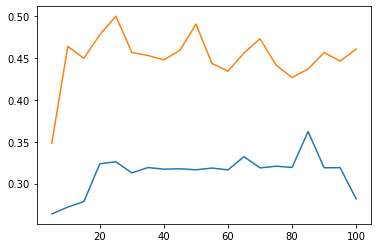

In [39]:
ari_l = []
ari_l1 = []
for i in np.arange(5,105,5):
    model2.train(txt_df['description_token'].tolist(), total_examples=model2.corpus_count, epochs=i)
    vector2 = model2.wv
    temp = txt_df['description_token'].apply(lambda x: get_mean(vector2, x))
    temp = pd.DataFrame(temp.tolist())
    clus.fit(temp)
    clus1.fit(temp)
    ari_l.append(metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 ))
    ari_l1.append(metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 ))
plt.plot(np.arange(5,105,5),ari_l)
plt.plot(np.arange(5,105,5),ari_l1)
plt.show()   

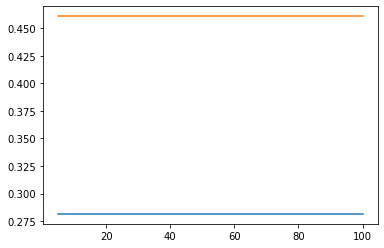

In [40]:
# test with skipgram instead of cbow
model3 = Word2Vec(vector_size = 300,sg =1)
model3.build_vocab(txt_df['description_token'].tolist())
ari_l = []
ari_l1 = []
for i in np.arange(5,105,5):
    model3.train(txt_df['description_token'].tolist(), total_examples=model2.corpus_count, epochs=i)
    vector3 = model2.wv
    temp = txt_df['description_token'].apply(lambda x: get_mean(vector3, x))
    temp = pd.DataFrame(temp.tolist())
    clus.fit(temp)
    clus1.fit(temp)
    ari_l.append(metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 ))
    ari_l1.append(metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 ))
plt.plot(np.arange(5,105,5),ari_l)
plt.plot(np.arange(5,105,5),ari_l1)
plt.show()

In [41]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

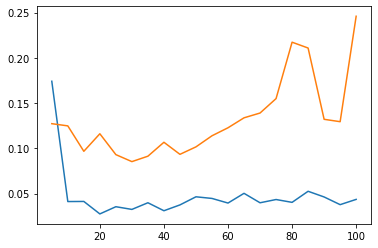

In [42]:

tagged_txt = [TaggedDocument(d, [i]) for i, d in enumerate(txt_df['description_token'].tolist())]
ari_l = []
ari_l1 = []
for i in np.arange(5,105,5):
    model4 = Doc2Vec(tagged_txt, epochs = i, vector_size = 300)
    temp = txt_df['description_token'].apply(lambda x: model4.infer_vector(x))
    temp = pd.DataFrame(temp.tolist())
    clus.fit(temp)
    clus1.fit(temp)
    ari_l.append(metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 ))
    ari_l1.append(metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 ))
plt.plot(np.arange(5,105,5),ari_l)
plt.plot(np.arange(5,105,5),ari_l1)
plt.show()   

## BERT

In [43]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [44]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [45]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

In [46]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import transformers 
from transformers import *

C:\Users\Nico\AppData\Roaming\Python\Python39\site-packages\transformers\generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(


In [47]:
# Hugging Face
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
        if mode=='Fine_Tune':
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.hidden_states[-1]
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
     
    return features_bert, last_hidden_states_tot

In [48]:
len(txt_df['description_clean'].tolist())

1010

In [50]:
max_length = 68
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = txt_df['description_clean'].tolist()

loading configuration file config.json from cache at C:\Users\Nico/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file tf_model.h5 from cache at C:\Users\Nico/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b

In [51]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

loading configuration file config.json from cache at C:\Users\Nico/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file vocab.txt from cache at C:\Users\Nico/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\vocab.txt

1/1 [==============================] - 1s 559ms/step


In [52]:
features_bert.shape

(1010, 768)

In [53]:
clus.fit(features_bert)
clus1.fit(features_bert)
ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
print('The ari scores are {} for categorie 0 and {} for categorie 1.'.format(ari, ari1))

The ari scores are 0.33405002168676506 for categorie 0 and 0.37897904620853956 for categorie 1.


In [54]:
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

In [55]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='TFhub')

loading configuration file config.json from cache at C:\Users\Nico/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file vocab.txt from cache at C:\Users\Nico/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\vocab.txt

In [56]:
clus.fit(features_bert)
clus1.fit(features_bert)
ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
print('The ari scores are {} for categorie 0 and {} for categorie 1.'.format(ari, ari1))

The ari scores are 0.33008615343702474 for categorie 0 and 0.36517656116473357 for categorie 1.


### Fine-Tune

In [57]:
# let's try to fine-tune this
from tensorflow.keras.optimizers import Adam
#tokenize
bert_tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
max_length = 34
doc_token = bert_tokenizer(sentences,max_length=max_length, padding = 'max_length', truncation = True, return_tensors="tf", return_attention_mask = False, return_token_type_ids=False)

loading configuration file config.json from cache at C:\Users\Nico/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file vocab.txt from cache at C:\Users\Nico/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\vocab.txt

In [58]:
temp = pd.DataFrame(sentences)
def tokenize_dataset(data):
    # Keys of the returned dictionary will be added to the dataset as columns
    return bert_tokenizer(data[0])


temp = temp.apply(tokenize_dataset)

In [59]:
model_ft = TFAutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=47,output_hidden_states=True)
model_ft.compile(optimizer=Adam(3e-5))


loading configuration file config.json from cache at C:\Users\Nico/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9",
    "10": "LABEL_10",
    "11": "LABEL_11",
    "12": "LABEL_12",
    "13": "LABEL_13",
    "14": "LABEL_14",
    "15": "LABEL_15",
    "16": "LABEL_16",
    "17": "LABEL_17",
    "18": "LABEL_18",
    "19": "LABEL_19",
    "20": "LABEL_20",
    "21": "LABEL_21",
    "22": "LABEL_22",
    "23": "LABEL_23",
   

In [60]:
labels = np.array(txt_df['labels_1'])

model_ft.fit(doc_token['input_ids'], labels)

32/32 [==============================] - 102s 3s/step - loss: 3.4141


In [61]:
sentences[0]

'key feature elegance polyester multicolor abstract eyelet door curtain floral curtainelegance polyester multicolor abstract eyelet door curtain height pack price curtain enhances look interiorsthis curtain made high quality polyester fabricit feature eyelet style stitch metal ringit make room environment romantic lovingthis curtain ant wrinkle anti shrinkage elegant apparancegive home bright modernistic appeal design surreal attention sure steal heart contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing print bring home elegant curtain softly filter light room get right amount sunlightspecifications elegance polyester multicolor abstract eyelet door curtain height pack general brand elegance designed door type eyelet model name abstract polyester door curtain set model duster color multicolor dimension length box number content sa

In [62]:
bert_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
max_length = 34

input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[0], 
                                                                      bert_tokenizer, max_length)

outputs = model_ft.predict([input_ids, attention_mask, token_type_ids], batch_size=11)


loading configuration file config.json from cache at C:\Users\Nico/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file vocab.txt from cache at C:\Users\Nico/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\vocab.txt

97/97 [==============================] - 32s 301ms/step


In [63]:
outputs.hidden_states[-1][-1].shape

(34, 768)

In [64]:
len(sentences[0])

1066

In [65]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = model_ft

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='Fine_Tune')

loading configuration file config.json from cache at C:\Users\Nico/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file vocab.txt from cache at C:\Users\Nico/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\vocab.txt

1/1 [==============================] - 0s 497ms/step


In [66]:
clus.fit(features_bert)
clus1.fit(features_bert)
ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
print('The ari scores are {} for categorie 0 and {} for categorie 1.'.format(ari, ari1))

The ari scores are 0.3630445328323434 for categorie 0 and 0.4569192556309186 for categorie 1.


## USE

In [71]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [72]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    return features

In [73]:
batch_size = 10
features_USE = feature_USE_fct(sentences, batch_size)

In [74]:
clus.fit(features_USE)
clus1.fit(features_USE)
ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
print('The ari scores are {} for categorie 0 and {} for categorie 1.'.format(ari, ari1))

The ari scores are 0.28956057525348555 for categorie 0 and 0.34568149765204165 for categorie 1.


## LDA

In [75]:
from sklearn.decomposition import LatentDirichletAllocation
n_topics = 7

# Créer le modèle LDA
lda = LatentDirichletAllocation(
        n_components=n_topics, 
        max_iter=5,  
        learning_offset=50.,
        random_state=0)

# Fitter sur les données
lda.fit(bag_of_words)

LatentDirichletAllocation(learning_offset=50.0, max_iter=5, n_components=7,
                          random_state=0)

In [76]:
vectorizer.get_feature_names_out()

array(['aaa battery battery life hour',
       'aapno rajasthan lovely jewellery vanity',
       'aapno rajasthan marvel marble gold', ...,
       'zyxel data card flipkartcom genuine',
       'zyxel pla flipkartcom genuine product',
       'zyxel vmgba vdsl wireless vdsl'], dtype=object)

In [77]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 5
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)


Topic 0:
flipkartcom genuine product free shipping genuine product free shipping cash product free shipping cash delivery special message holiday cheer love love cupcake affordable mug perfect
Topic 1:
design stay permanent year come mug feature porcelain crafting ensuring pick gift loved toodishwasher microwave rockmantra mug feature porcelain crafting ensuring design stay permanent year
Topic 2:
number content sale package pack skin mouse pad combo set laptop skin mouse pad combo box number content sale package mouse pad combo set multicolor
Topic 3:
guarantee free shipping cash delivery product day replacement guarantee free replacement guarantee free shipping cash day replacement guarantee free shipping genuine product day replacement guarantee
Topic 4:
best price free shipping cash shipping cash delivery genuine product free shipping cash delivery genuine cash delivery genuine product day price free shipping cash delivery
Topic 5:
genuine product day replacement guarantee adorable